## Homework 1: Part II: Regression Modeling with the AI Job Market Data ## 

Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [3]:
df = pd.read_csv("ai_jobs.csv")
#skills = pd.read_csv("skills_demand.csv")
#job_map = pd.read_csv("job_title_mapping.csv")
#country_trends = pd.read_csv("country_ai_trends.csv")

Dimensions

In [4]:
df.shape

(50000, 14)

Column Names

In [5]:
df.columns.tolist()

['job_id',
 'job_title',
 'company_type',
 'industry',
 'country',
 'city',
 'remote_type',
 'experience_level',
 'min_experience_years',
 'salary_min_usd',
 'salary_max_usd',
 'employment_type',
 'posted_year',
 'company_size']

Data Types

In [6]:
df.dtypes

job_id                  object
job_title               object
company_type            object
industry                object
country                 object
city                    object
remote_type             object
experience_level        object
min_experience_years     int64
salary_min_usd           int64
salary_max_usd           int64
employment_type         object
posted_year              int64
company_size            object
dtype: object

First few rows

In [7]:
df.head()

,job_id,job_title,company_type,industry,country,city,remote_type,experience_level,min_experience_years,salary_min_usd,salary_max_usd,employment_type,posted_year,company_size
0,0IFD0TVBDIVU,MLOps Engineer,Research Lab,Education,Australia,Remote,Remote,Entry,0,56873,72223,Full-time,2023,Large
1,ZMF8MDD4V30T,Data Analyst,Startup,Education,Germany,Remote,Remote,Entry,0,54803,85599,Full-time,2024,Medium
2,CX1945NQ4FMY,MLOps Engineer,Research Lab,Tech,Canada,Remote,Remote,Senior,5,149980,175806,Full-time,2021,Large
3,QJ7YHL1C32OC,Applied Scientist,Research Lab,Healthcare,Australia,Remote,Remote,Entry,0,53483,86477,Full-time,2023,Medium
4,F0T0PVN9ER14,Machine Learning Engineer,Research Lab,Finance,Australia,Sydney,Hybrid,Mid,2,102977,127298,Full-time,2023,Large


Check missing values

In [8]:
df.isna().sum()

job_id                  0
job_title               0
company_type            0
industry                0
country                 0
city                    0
remote_type             0
experience_level        0
min_experience_years    0
salary_min_usd          0
salary_max_usd          0
employment_type         0
posted_year             0
company_size            0
dtype: int64

Summary Statistics

In [9]:
df.describe()

,min_experience_years,salary_min_usd,salary_max_usd,posted_year
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.335500,100871.434320,120858.350740,2022.996360
std,2.054172,37043.446641,37531.386484,2.001286
min,0.000000,50000.000000,65000.000000,2020.000000
25%,0.000000,61287.000000,83739.000000,2021.000000
50%,2.000000,97505.000000,117604.000000,2023.000000
75%,5.000000,143730.500000,161348.750000,2025.000000
max,5.000000,154999.000000,180000.000000,2026.000000


Clean Data

In [10]:
# Drop id and train columns
clean_cols = df.drop(columns=["job_id"]).columns

Job Title Frequency Table

In [11]:
role_freq = (
    df["job_title"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index": "job_title"})
)

role_freq["percentage"] = (
    role_freq["count"] / role_freq["count"].sum() * 100
)

role_freq.head(10)


,job_title,count,percentage
0,MLOps Engineer,8439,16.878
1,AI Researcher,8415,16.830
2,Data Scientist,8410,16.820
3,Applied Scientist,8298,16.596
4,Data Analyst,8260,16.520
5,Machine Learning Engineer,8178,16.356


Job Title Frequency Distribution

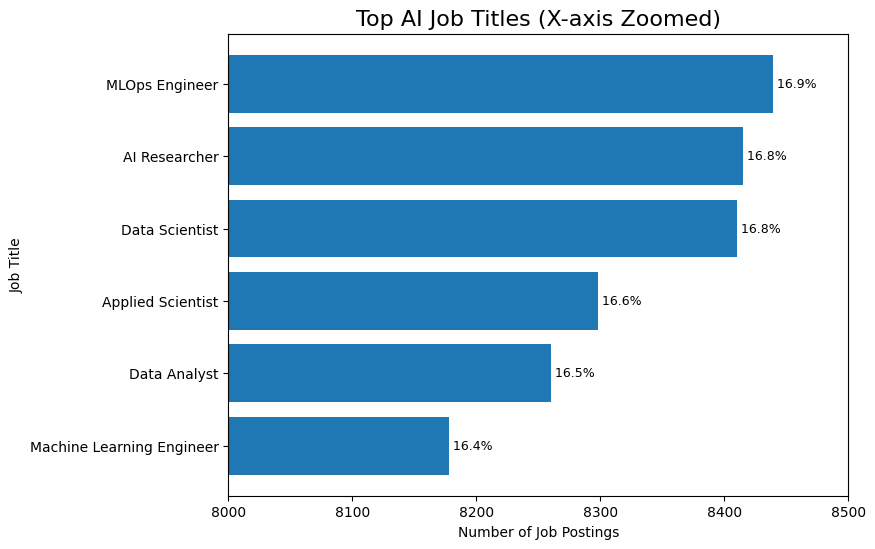

In [12]:
counts = df["job_title"].value_counts().head(15)
percentages = counts / counts.sum() * 100

fig, ax = plt.subplots(figsize=(8,6))

bars = ax.barh(counts.index, counts.values)

ax.set_title("Top AI Job Titles (X-axis Zoomed)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Job Title")

for bar, pct in zip(bars, percentages):
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f" {pct:.1f}%",
        va="center",
        fontsize=9
    )

ax.invert_yaxis()
plt.xlim(8000, 8500)  # zoom windowt()
plt.show()


Job Postings by Year Frequency Distribution

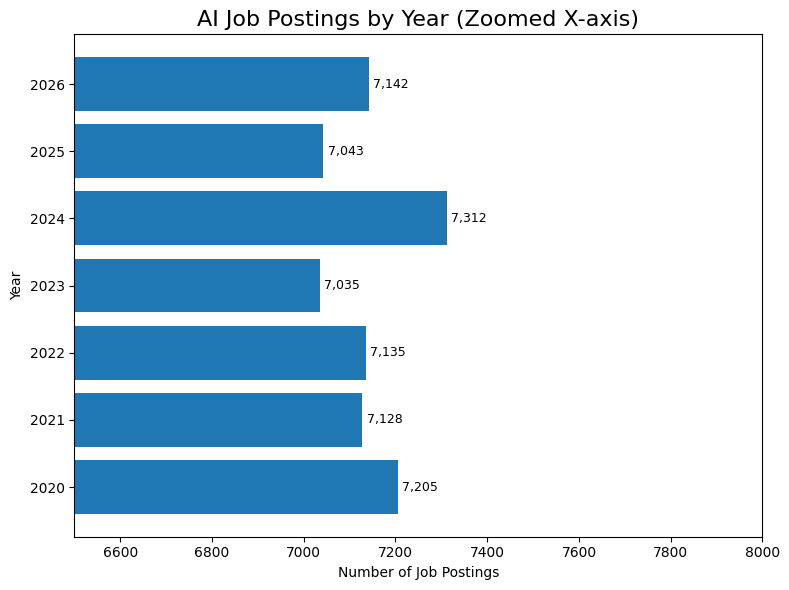

In [44]:
year_freq = df["posted_year"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,6))

bars = ax.barh(
    year_freq.index.astype(str),
    year_freq.values
)

ax.set_title("AI Job Postings by Year (Zoomed X-axis)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Year")

for bar, count in zip(bars, year_freq.values):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{count:,}",
        va="center",
        fontsize=9
    )

ax.set_xlim(6500, 8000)
plt.tight_layout()
plt.show()


Set bins for salary ranges

In [14]:
bins = [45000, 75000, 100000, 125000, 150000, 200000]

df["salary_bin"] = pd.cut(
    df["salary_min_usd"],
    bins=bins
)

df["salary_bin"].value_counts().sort_index()


salary_bin
(45000, 75000]      16628
(75000, 100000]     11135
(100000, 125000]     5560
(125000, 150000]    11145
(150000, 200000]     5532
Name: count, dtype: int64

Salary Frequency Distribution by min_usd

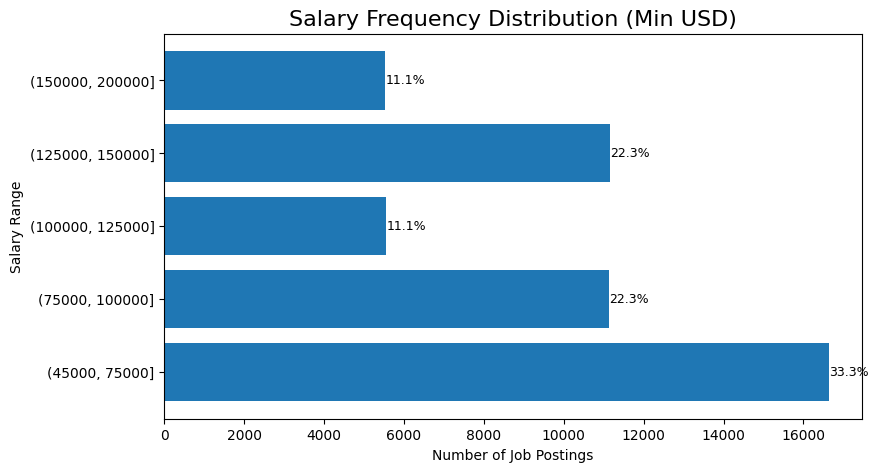

In [15]:
salary_freq = df["salary_bin"].value_counts().sort_index()
percentages = (salary_freq / salary_freq.sum() * 100).values

fig, ax = plt.subplots(figsize=(9,5))

bars = ax.barh(
    salary_freq.index.astype(str),
    salary_freq.values
)

ax.set_title("Salary Frequency Distribution (Min USD)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Salary Range")

for bar, pct in zip(bars, percentages):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        fontsize=9
    )

plt.show()

Job Postings by Country Frequency Distribution

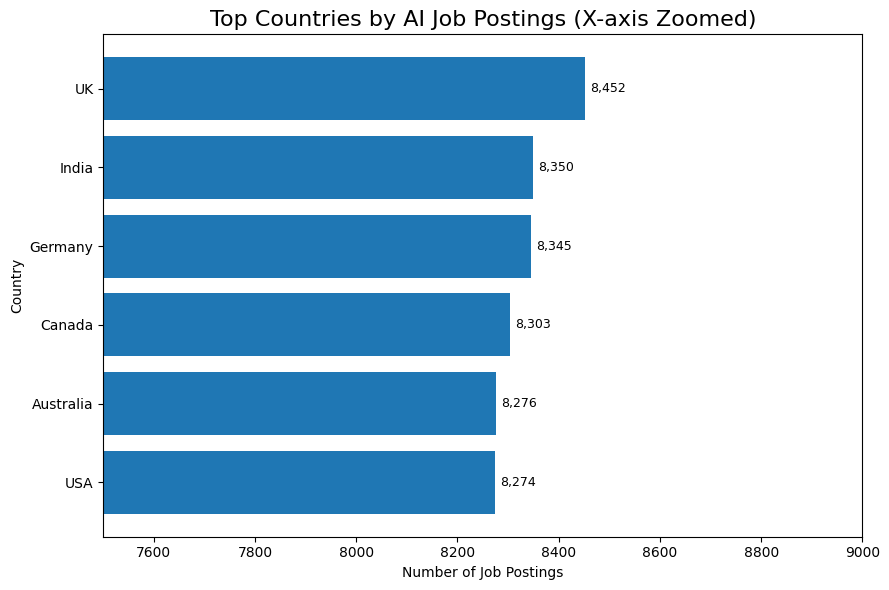

In [43]:
top_n = 10

country_freq = (
    df["country"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index": "country"})
)

country_freq_top = country_freq.head(top_n)

fig, ax = plt.subplots(figsize=(9,6))

bars = ax.barh(
    country_freq_top["country"],
    country_freq_top["count"]
)

ax.set_title("Top Countries by AI Job Postings (X-axis Zoomed)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Country")

for bar, count in zip(bars, country_freq_top["count"]):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{count:,}",   # comma formatting
        va="center",
        fontsize=9
    )

ax.invert_yaxis()
ax.set_xlim(7500, 9000)
plt.tight_layout()
plt.show()


Job Postings by Company Type Frequency Distribution

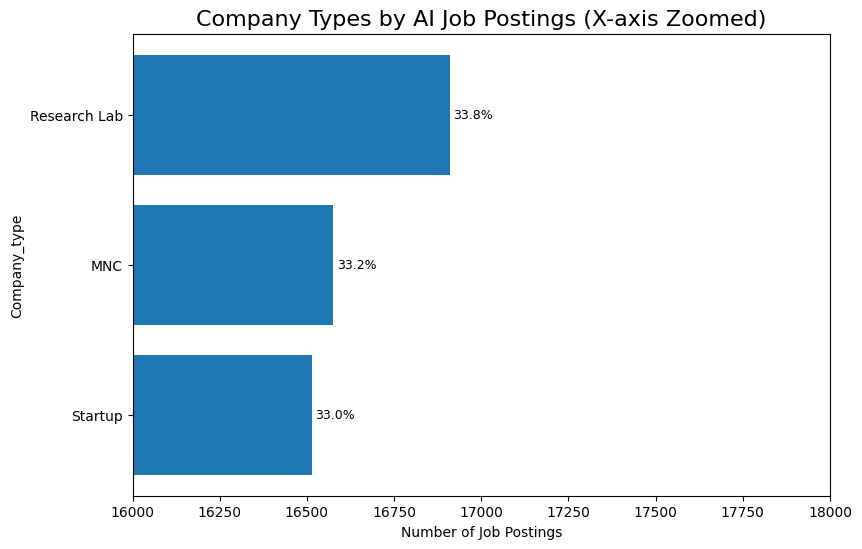

In [17]:
top_n = 10

company_freq = (
    df["company_type"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index": "company_type"})
)

company_freq["percentage"] = (
    company_freq["count"] / company_freq["count"].sum() * 100
)

company_freq_top = company_freq.head(top_n)

fig, ax = plt.subplots(figsize=(9,6))

bars = ax.barh(
    company_freq_top["company_type"],
    company_freq_top["count"]
)

ax.set_title("Company Types by AI Job Postings (X-axis Zoomed)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Company_type")

for bar, pct in zip(bars, company_freq_top["percentage"]):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        fontsize=9
    )

ax.invert_yaxis()
ax.set_xlim(16000, 18000)
plt.show()


Job Postings by Industry Frequency Distribution

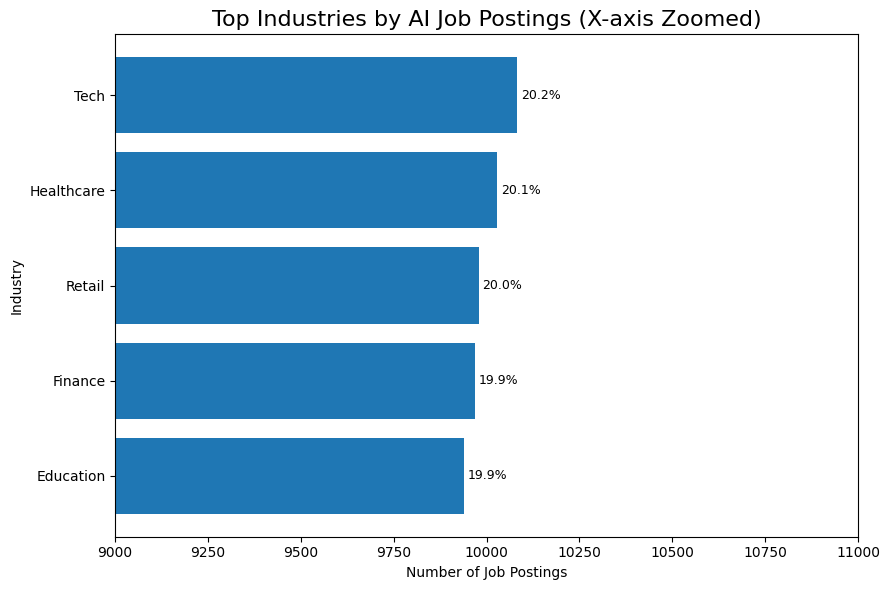

In [18]:
top_n = 10

industry_freq = (
    df["industry"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index": "industry"})
)

industry_freq["percentage"] = (
    industry_freq["count"] / industry_freq["count"].sum() * 100
)

industry_freq_top = industry_freq.head(top_n)

fig, ax = plt.subplots(figsize=(9,6))

bars = ax.barh(
    industry_freq_top["industry"],
    industry_freq_top["count"]
)

ax.set_title("Top Industries by AI Job Postings (X-axis Zoomed)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Industry")

for bar, pct in zip(bars, industry_freq_top["percentage"]):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        fontsize=9
    )

ax.invert_yaxis()
ax.set_xlim(9000, 11000)
plt.tight_layout()
plt.show()


Job Postings by Employment Type Frequency Distribution

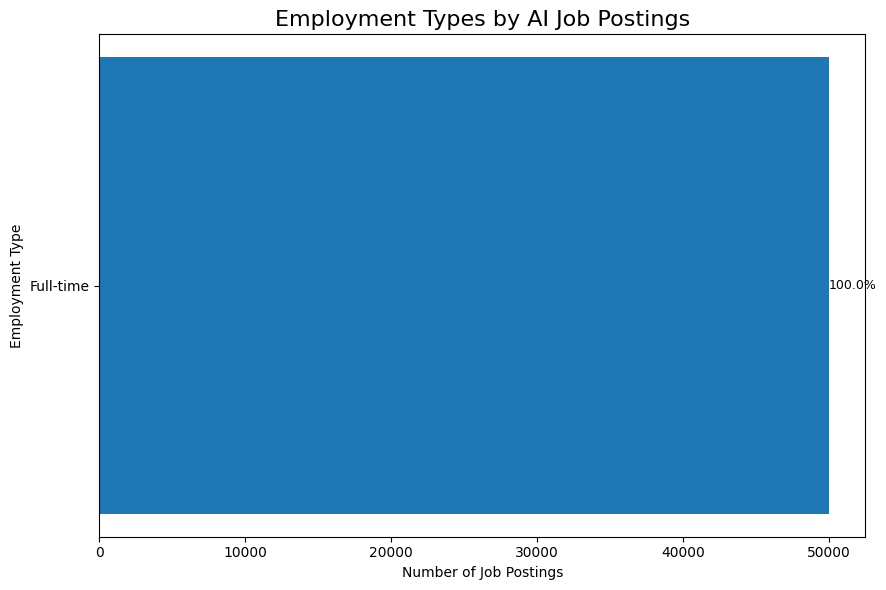

In [19]:
top_n = 10

employment_type_freq = (
    df["employment_type"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index": "employment_type"})
)

employment_type_freq["percentage"] = (
    employment_type_freq["count"] / employment_type_freq["count"].sum() * 100
)

employment_type_freq_top = employment_type_freq.head(top_n)

fig, ax = plt.subplots(figsize=(9,6))

bars = ax.barh(
    employment_type_freq_top["employment_type"],
    employment_type_freq_top["count"]
)

ax.set_title("Employment Types by AI Job Postings", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Employment Type")

for bar, pct in zip(bars, employment_type_freq_top["percentage"]):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        fontsize=9
    )

ax.invert_yaxis()
#ax.set_xlim(7500, 9000)
plt.tight_layout()
plt.show()


Job Postings by Company Size Frequency Distribution

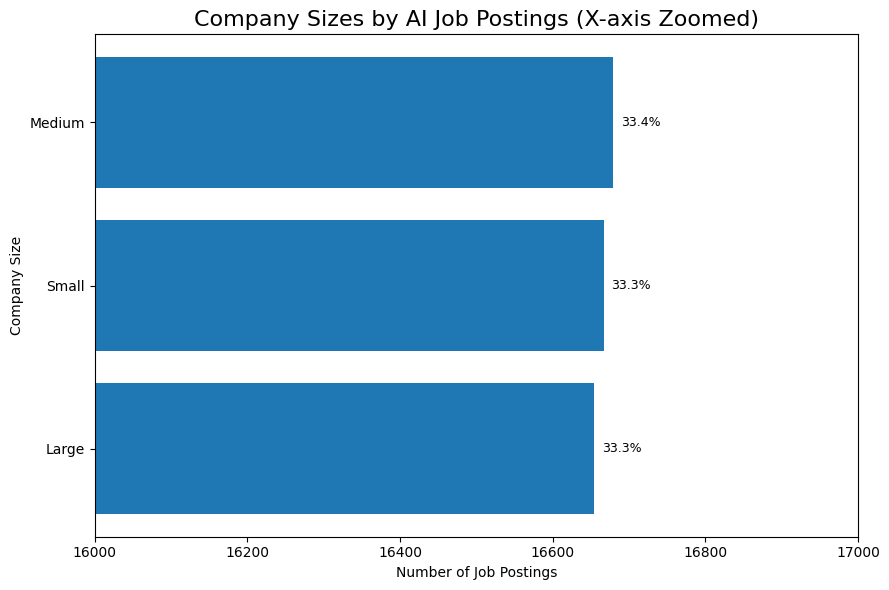

In [20]:
top_n = 10

company_size_freq = (
    df["company_size"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index": "company_size"})
)

company_size_freq["percentage"] = (
    company_size_freq["count"] / company_size_freq["count"].sum() * 100
)

company_size_freq_top = company_size_freq.head(top_n)

fig, ax = plt.subplots(figsize=(9,6))

bars = ax.barh(
    company_size_freq_top["company_size"],
    company_size_freq_top["count"]
)

ax.set_title("Company Sizes by AI Job Postings (X-axis Zoomed)", fontsize=16)
ax.set_xlabel("Number of Job Postings")
ax.set_ylabel("Company Size")

for bar, pct in zip(bars, company_size_freq_top["percentage"]):
    ax.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        fontsize=9
    )

ax.invert_yaxis()
ax.set_xlim(16000, 17000)
plt.tight_layout()
plt.show()


Raw vs. Log Transformed Minimum Salary Distribution

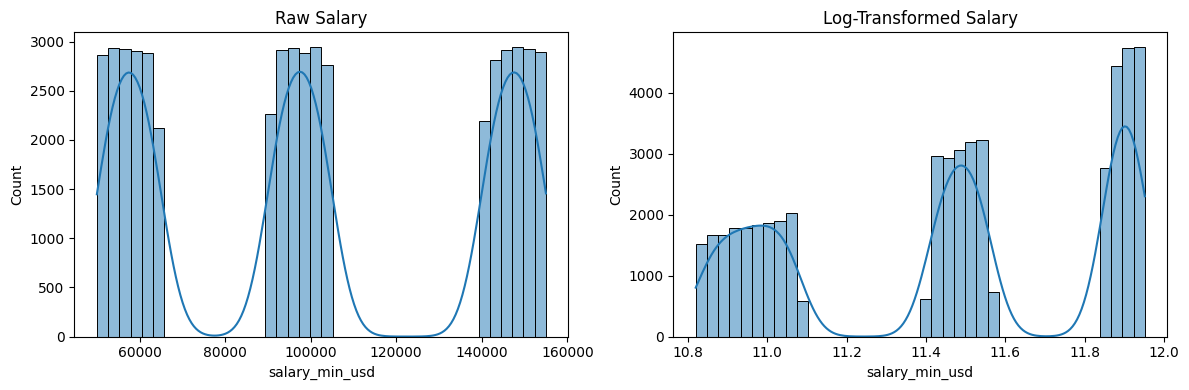

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["salary_min_usd"], ax=axes[0], bins=40, kde=True)
axes[0].set_title("Raw Salary")

sns.histplot(np.log(df["salary_min_usd"]), ax=axes[1], bins=40, kde=True)
axes[1].set_title("Log-Transformed Salary")

plt.tight_layout()
plt.show()


Raw vs. Log Transformed Maximum Salary Distribution

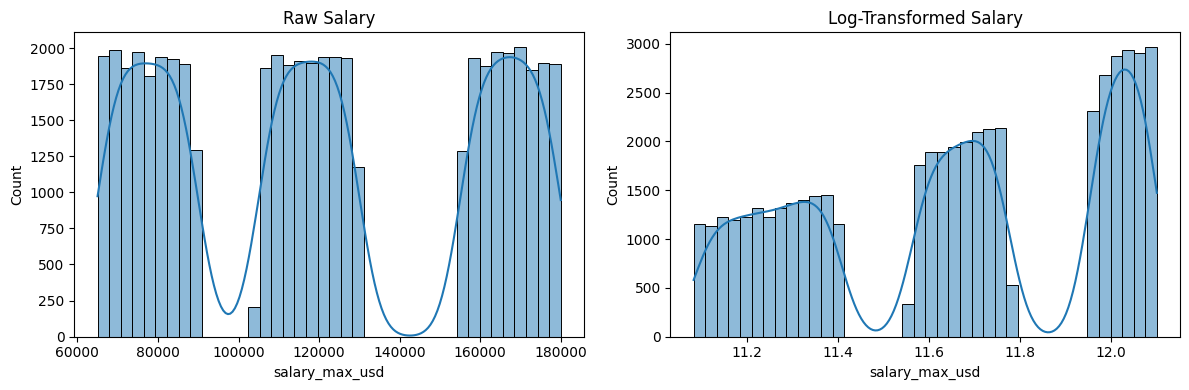

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["salary_max_usd"], ax=axes[0], bins=40, kde=True)
axes[0].set_title("Raw Salary")

sns.histplot(np.log(df["salary_max_usd"]), ax=axes[1], bins=40, kde=True)
axes[1].set_title("Log-Transformed Salary")

plt.tight_layout()
plt.show()


Log Transform both salary_min and salary_max

In [23]:
df["log_salary_min"] = np.log(df["salary_min_usd"])
df["log_salary_max"] = np.log(df["salary_max_usd"])

Log Transform Salary vs. Minimum Experience Years

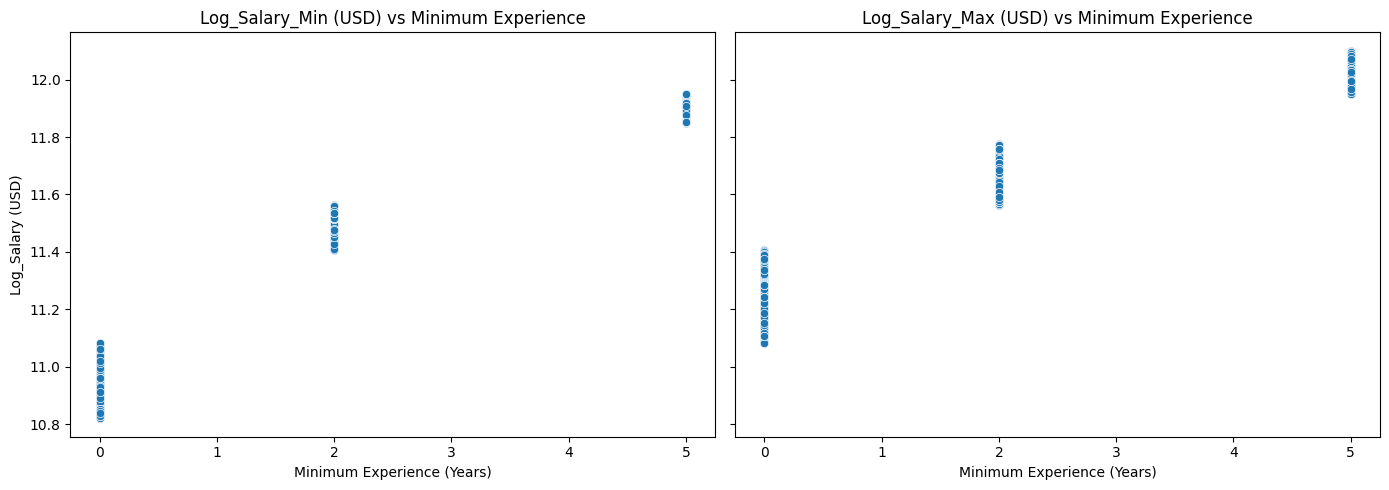

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Log Salary Min
sns.scatterplot(
    x="min_experience_years",
    y="log_salary_min",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Log_Salary_Min (USD) vs Minimum Experience")
axes[0].set_xlabel("Minimum Experience (Years)")
axes[0].set_ylabel("Log_Salary (USD)")

# Log Salary Max
sns.scatterplot(
    x="min_experience_years",
    y="log_salary_max",
    data=df,
    ax=axes[1]
)
axes[1].set_title("Log_Salary_Max (USD) vs Minimum Experience")
axes[1].set_xlabel("Minimum Experience (Years)")
axes[1].set_ylabel("") 

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Experience Level

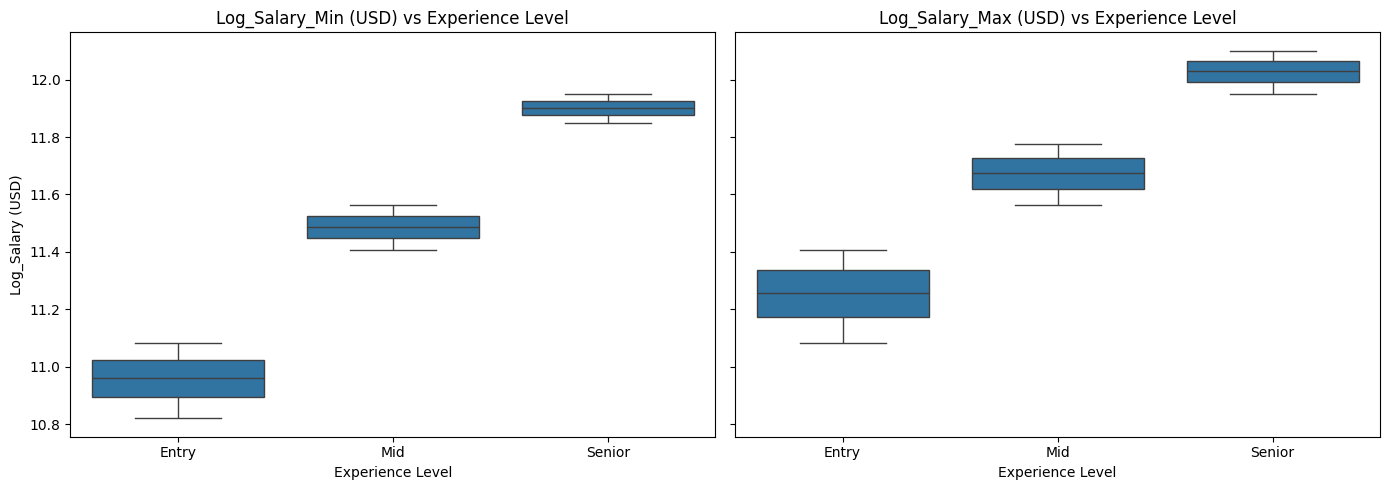

In [25]:
experience_order = ["Entry", "Mid", "Senior"]


fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Log Salary Min
sns.boxplot(
    x="experience_level",
    y="log_salary_min",
    data=df,
    order=experience_order,
    ax=axes[0]
)

axes[0].set_title("Log_Salary_Min (USD) vs Experience Level")
axes[0].set_xlabel("Experience Level")
axes[0].set_ylabel("Log_Salary (USD)")

# Log Salary Max
sns.boxplot(
    x="experience_level",
    y="log_salary_max",
    data=df,
    order=experience_order,
    ax=axes[1]
)   

axes[1].set_title("Log_Salary_Max (USD) vs Experience Level")
axes[1].set_xlabel("Experience Level")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()



Log Transform Salary_min_usd vs. Job Title

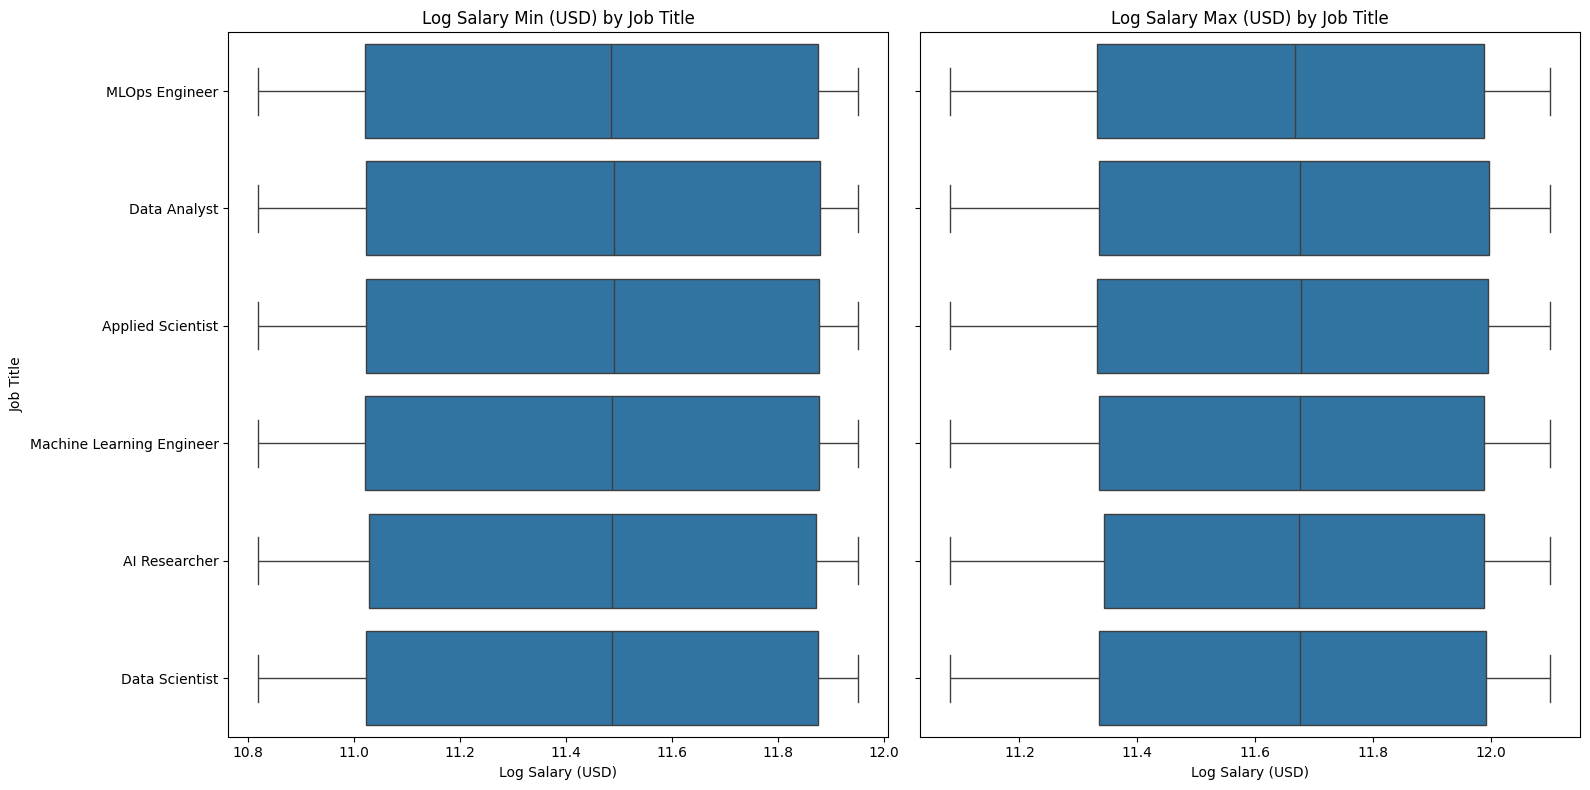

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="job_title",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by Job Title")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Job Title")

# Log Salary Max
sns.boxplot(
    y="job_title",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by Job Title")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Country

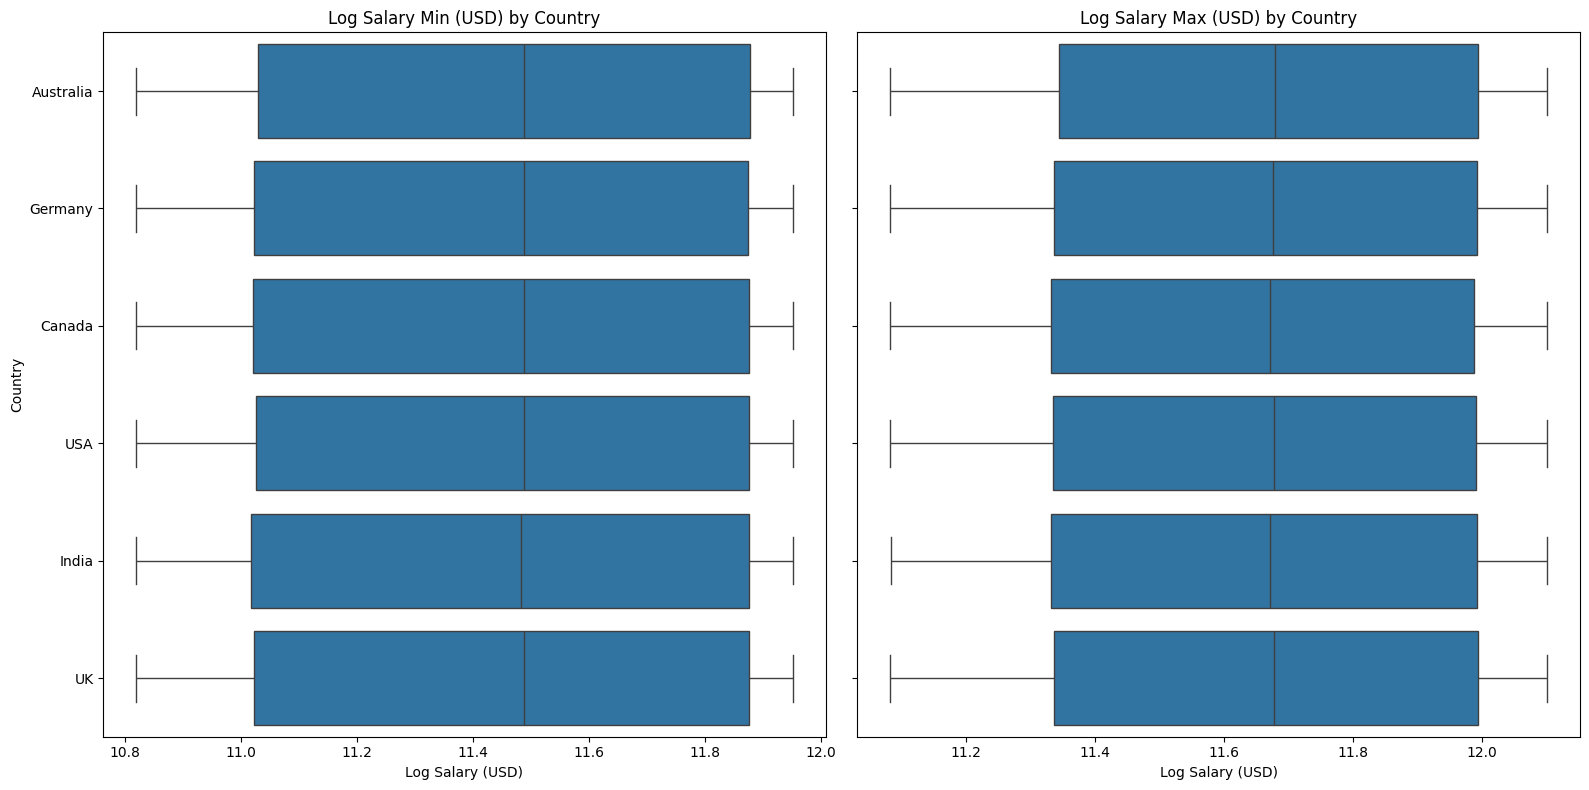

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="country",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by Country")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Country")

# Log Salary Max
sns.boxplot(
    y="country",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by Country")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. City

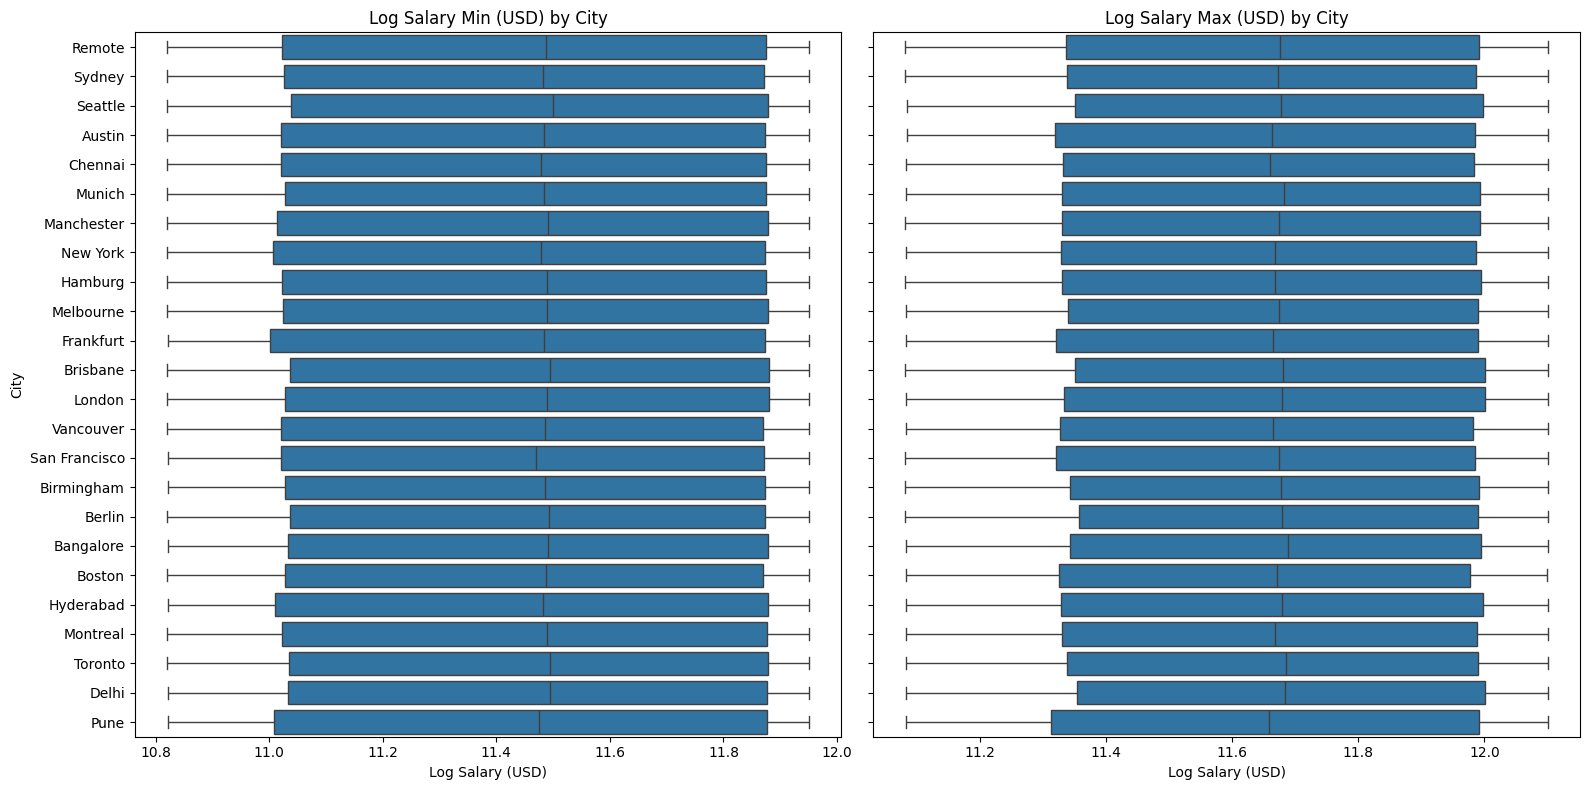

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="city",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by City")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("City")

# Log Salary Max
sns.boxplot(
    y="city",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by City")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Remote Type

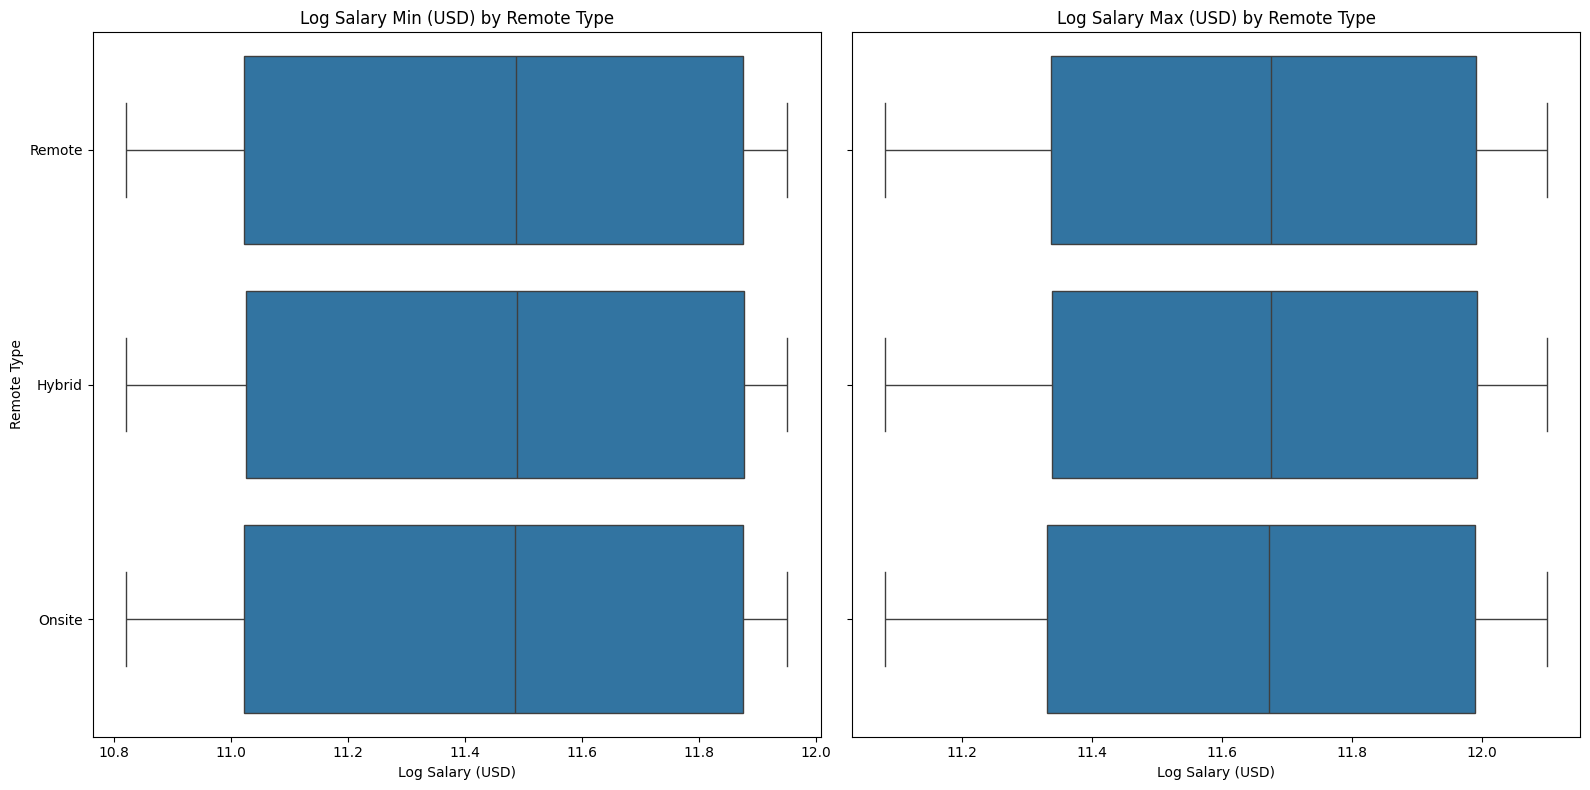

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="remote_type",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by Remote Type")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Remote Type")

# Log Salary Max
sns.boxplot(
    y="remote_type",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by Remote Type")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Industry

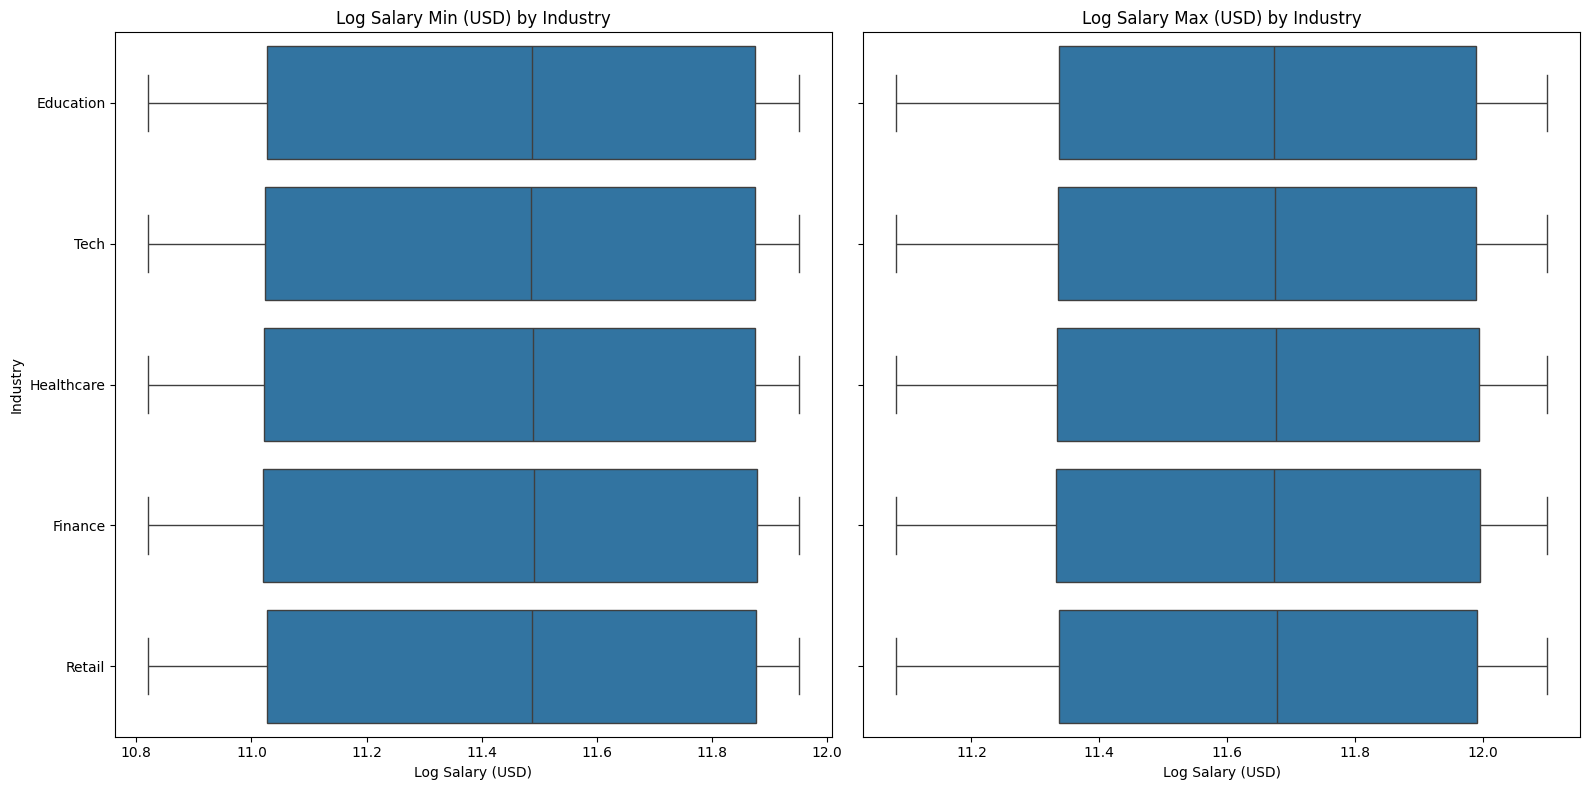

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="industry",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by Industry")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Industry")

# Log Salary Max
sns.boxplot(
    y="industry",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by Industry")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Company Size

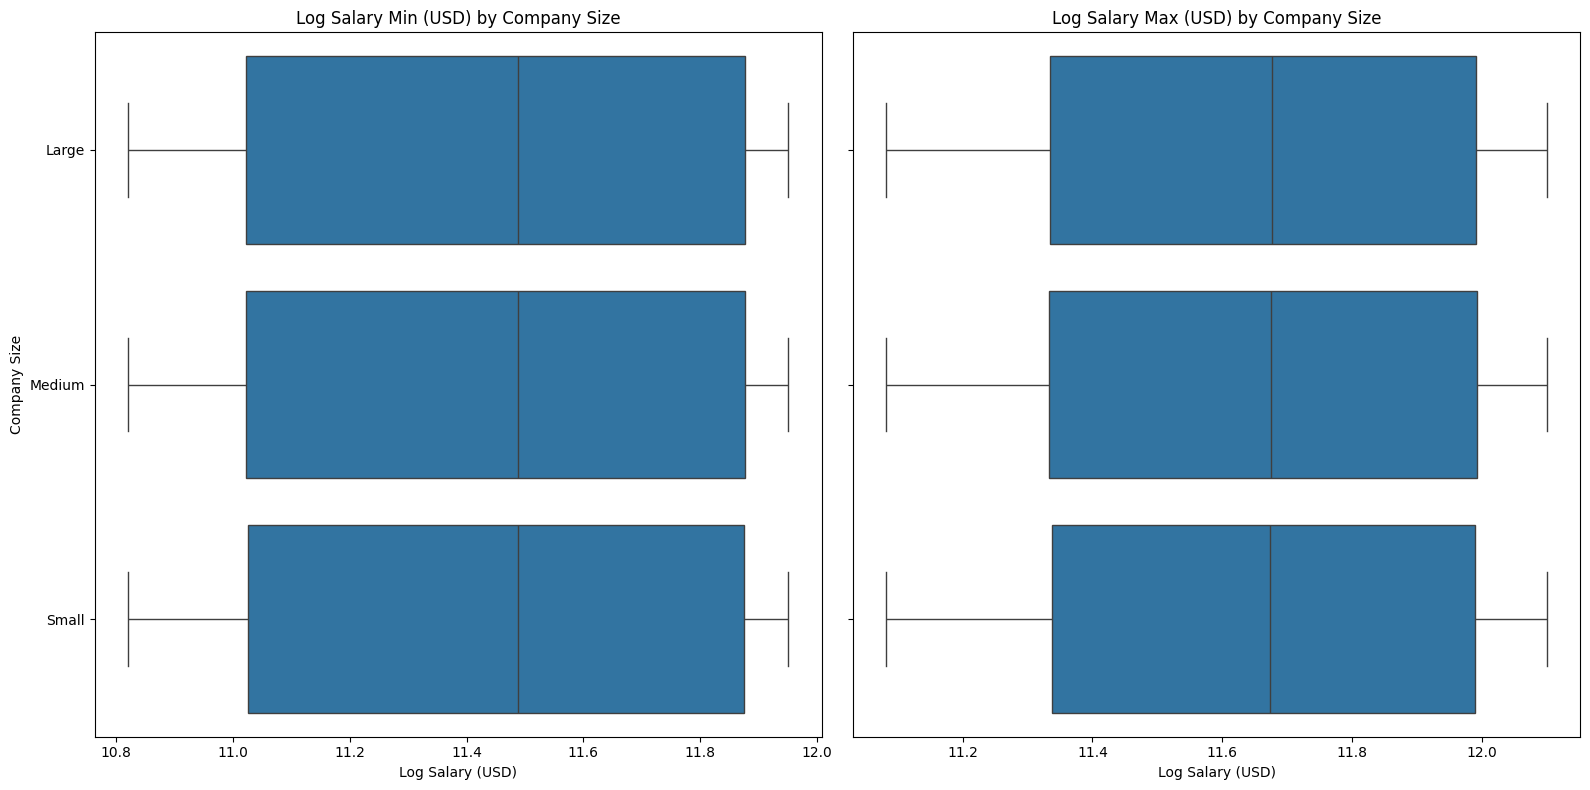

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="company_size",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by Company Size")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Company Size")

# Log Salary Max
sns.boxplot(
    y="company_size",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by Company Size")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Company Type

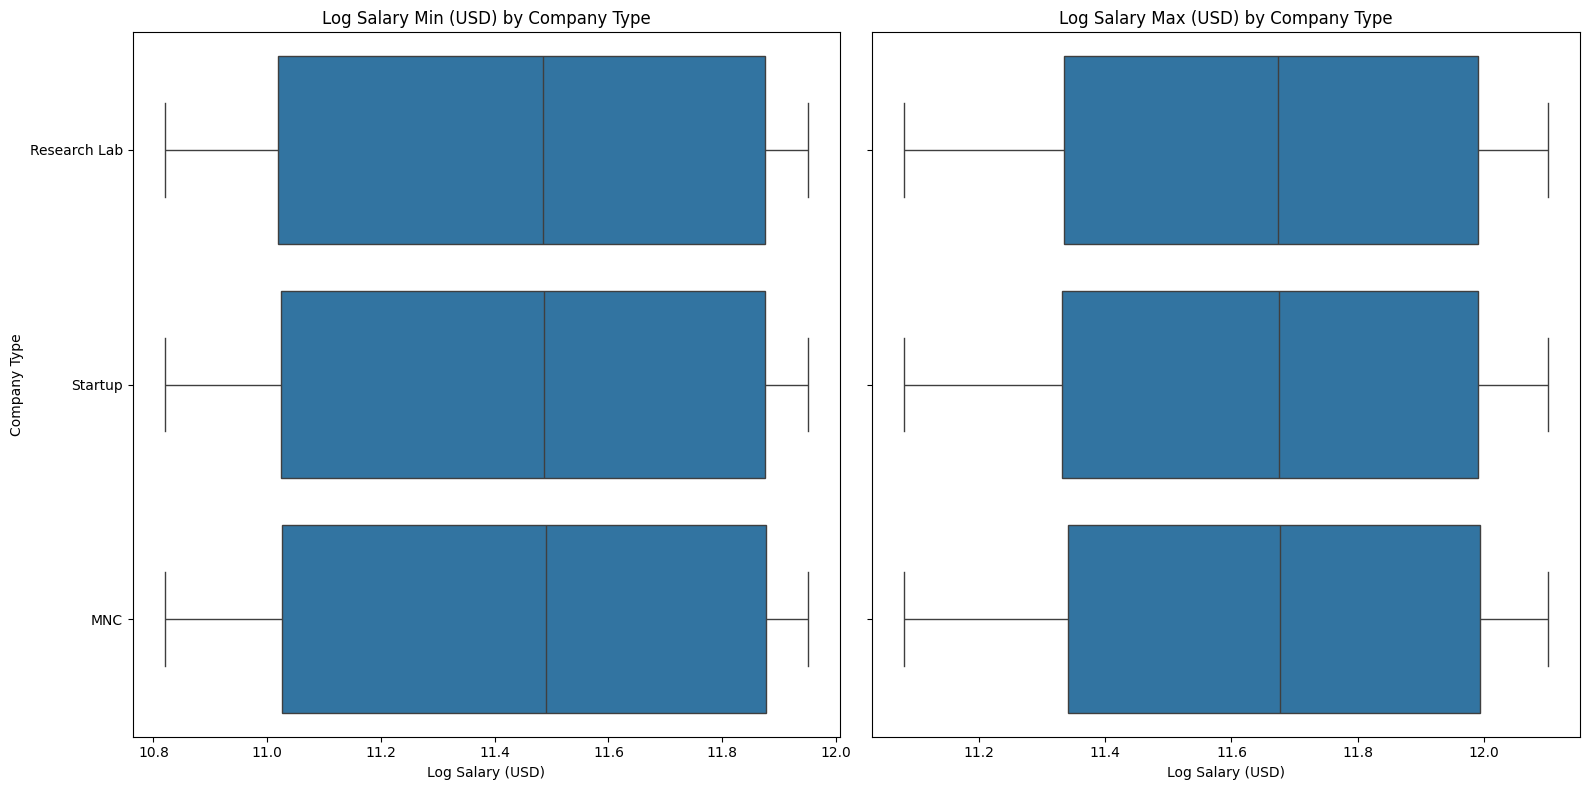

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="company_type",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)

axes[0].set_title("Log Salary Min (USD) by Company Type")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Company Type")

# Log Salary Max
sns.boxplot(
    y="company_type",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)

axes[1].set_title("Log Salary Max (USD) by Company Type")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")  # avoid duplicate label

plt.tight_layout()
plt.show()


Log Transform Salary_min_usd vs. Year

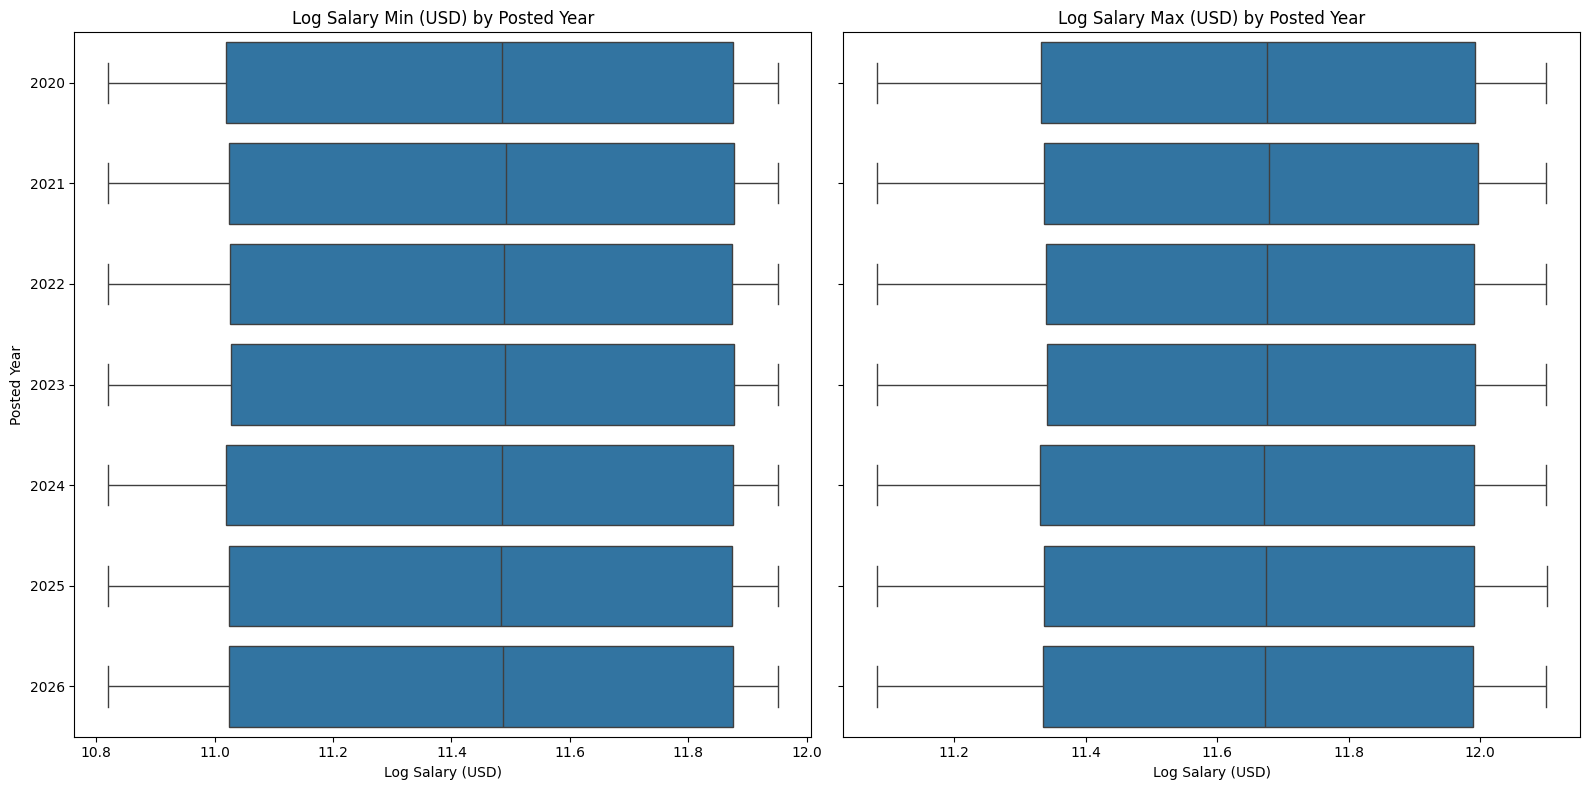

In [32]:
df["posted_year_cat"] = pd.Categorical(
    df["posted_year"],
    categories=sorted(df["posted_year"].unique()),
    ordered=True
)

ffig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Log Salary Min
sns.boxplot(
    y="posted_year_cat",
    x="log_salary_min",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Log Salary Min (USD) by Posted Year")
axes[0].set_xlabel("Log Salary (USD)")
axes[0].set_ylabel("Posted Year")

# Log Salary Max
sns.boxplot(
    y="posted_year_cat",
    x="log_salary_max",
    data=df,
    ax=axes[1]
)
axes[1].set_title("Log Salary Max (USD) by Posted Year")
axes[1].set_xlabel("Log Salary (USD)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()



Stratify dataset by salary bins for train & test data split

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

bins = [0, 45000, 75000, 100000, 125000, 150000, 200000, np.inf]
df["salary_bin"] = pd.cut(df["salary_min_usd"], bins=bins, include_lowest=True)

# sanity checks
print("NaNs in salary_bin:", df["salary_bin"].isna().sum())
print(df["salary_bin"].value_counts())

y_min = df["log_salary_min"]
y_max = df["log_salary_max"]

X = df.drop(columns=["log_salary_min", "log_salary_max", "salary_bin"])

X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    X, y_min, y_max,
    test_size=0.2,
    random_state=42,
    stratify=df["salary_bin"]
)


NaNs in salary_bin: 0
salary_bin
(45000.0, 75000.0]      16628
(125000.0, 150000.0]    11145
(75000.0, 100000.0]     11135
(100000.0, 125000.0]     5560
(150000.0, 200000.0]     5532
(-0.001, 45000.0]           0
(200000.0, inf]             0
Name: count, dtype: int64


Numerical Inspection of Train & Test split

In [34]:
pd.concat(
    [
        y_min_train.rename("train"),
        y_min_test.rename("test")
    ],
    axis=1
).describe()


,train,test
count,40000.000000,10000.000000
mean,11.448821,11.448185
std,0.389782,0.389843
min,10.819778,10.819778
25%,11.023482,11.022854
50%,11.488151,11.485215
75%,11.875796,11.875332
max,11.951174,11.951155


Visual Inspection of Train & Test Split for log_salary_min

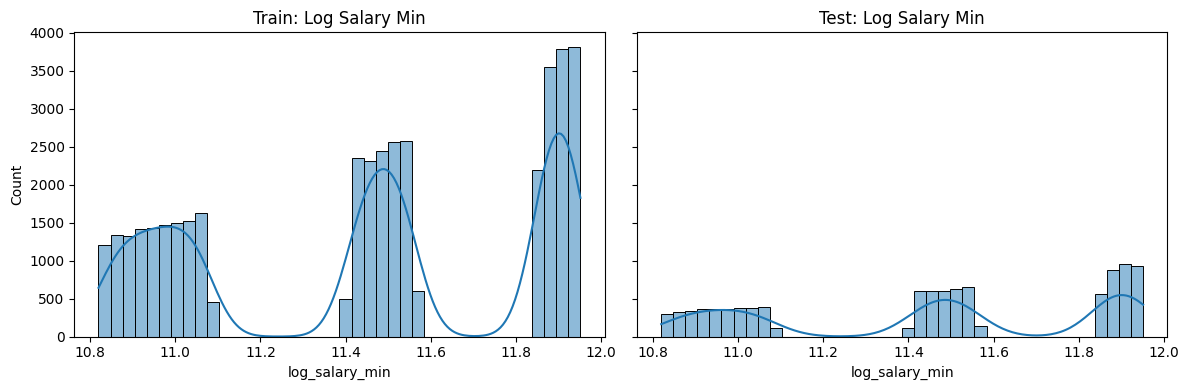

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.histplot(y_min_train, bins=40, kde=True, ax=axes[0])
axes[0].set_title("Train: Log Salary Min")

sns.histplot(y_min_test, bins=40, kde=True, ax=axes[1])
axes[1].set_title("Test: Log Salary Min")

plt.tight_layout()
plt.show()


Visual Inspection of Train & Test Split for log_salary_max

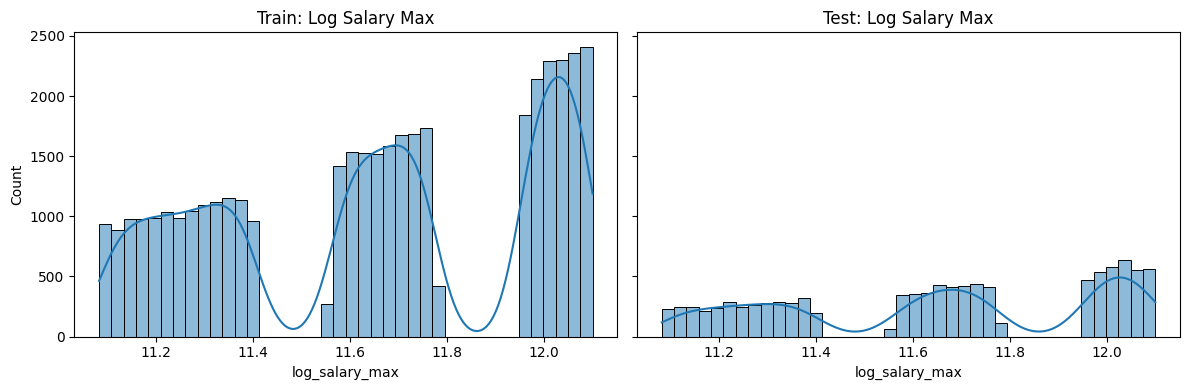

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.histplot(y_max_train, bins=40, kde=True, ax=axes[0])
axes[0].set_title("Train: Log Salary Max")

sns.histplot(y_max_test, bins=40, kde=True, ax=axes[1])
axes[1].set_title("Test: Log Salary Max")

plt.tight_layout()
plt.show()


Prepare & export train & test to .csv for regression analysis in R

In [37]:
train_df = X_train.copy()
train_df["log_salary_min"] = y_min_train
train_df["log_salary_max"] = y_max_train

test_df = X_test.copy()
test_df["log_salary_min"] = y_min_test
test_df["log_salary_max"] = y_max_test
train_df.shape, test_df.shape


((40000, 17), (10000, 17))

In [38]:
train_df.to_csv("ai_jobs_train.csv", index=False)
test_df.to_csv("ai_jobs_test.csv", index=False)
